In [5]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [6]:
data_raw=pd.read_csv("../data/Train.csv")
data = data_raw.copy()
import sys
sys.path.append('../files')
from preprocessing import preprocessing

In [7]:
data = preprocessing(data, use_location=False, only_means=False)

In [8]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
#reg = DecisionTreeRegressor(max_depth=20, min_samples_leaf=10)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)
print(mean_squared_error(y_test, y_pred_reg, squared=False))
y_pred_reg_train = reg.predict(X_train)
print(mean_squared_error(y_train, y_pred_reg_train, squared=False))

39.868297663189644
38.19648367038271


In [10]:
sns.set(font_scale = 1.2)


Text(0.5, 0, 'datapoint')

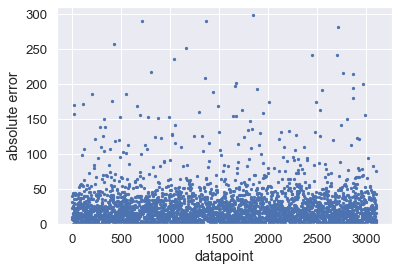

In [11]:
plt.scatter(range(len(y_test)),np.abs(y_test-y_pred_reg), s=5.0)
plt.ylim([0,310])
plt.ylabel('absolute error')
plt.xlabel('datapoint')

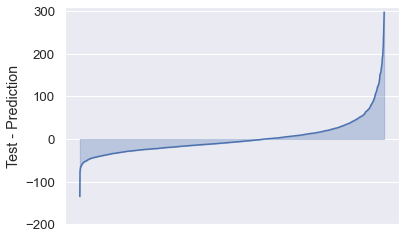

In [12]:
errors = sorted(y_test-y_pred_reg)
#plt.scatter(x=range(len(y_test)),y= errors, s=5.0)
plt.plot(errors)
plt.xticks([])
plt.ylim([-200,310])
plt.ylabel('Test - Prediction')
#plt.xlabel('datapoint')
plt.fill_between(x= range(len(errors)), y1= errors, color= "b", alpha= 0.3)

(-10.0, 310.0)

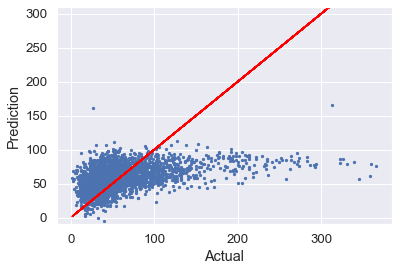

In [13]:
plt.scatter(x=y_test,y= y_pred_reg, s=5.0)
#plt.yscale('log')
#plt.xscale('log')
plt.plot(y_test, y_test, color='red')
plt.ylabel('Prediction')
plt.xlabel('Actual')
#plt.xlim([0,100])
plt.ylim([-10,310])